In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion



['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")
spectra = imze.get_region_array(0)
imze.normalize_region_array(spectra, normalize="max_intensity_region")


Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
(45, 59, 17900)


In [3]:
print("Got spectra", spectra.shape)

Got spectra (45, 59, 17900)


In [4]:
sum(spectra[0,0])

94.93629248736084

In [5]:
spec = SpectraRegion(spectra, imze.mzValues)

In [6]:
spec.calculate_similarity(mode="spectra_log_dist")

2020-06-05 16:27:50,327  SpectraRegion  INFO: Creating C++ obj
2020-06-05 16:27:50,328  SpectraRegion  INFO: dimensions 17900
2020-06-05 16:27:50,329  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-06-05 16:27:50,330  SpectraRegion  INFO: Switching to dot mode
2020-06-05 16:27:50,330  SpectraRegion  INFO: Starting calc similarity c++
2020-06-05 16:32:03,618  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-06-05 16:32:03,639  SpectraRegion  INFO: Calculating spectra similarity
2020-06-05 16:32:03,822  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-05 16:32:03,824  SpectraRegion  INFO: Calculating dist pixel map
2020-06-05 16:33:17,678  SpectraRegion  INFO: Calculating dist pixel map done


array([[0.94999999, 0.92799679, 0.92205312, ..., 0.84527737, 0.84791523,
        0.85876535],
       [0.92799679, 0.94999999, 0.93488077, ..., 0.89359014, 0.89607352,
        0.90569586],
       [0.92205312, 0.93488077, 0.94999999, ..., 0.90869918, 0.90700655,
        0.91964185],
       ...,
       [0.84527737, 0.89359014, 0.90869918, ..., 0.94999999, 0.91141728,
        0.91717233],
       [0.84791523, 0.89607352, 0.90700655, ..., 0.91141728, 0.94999999,
        0.9172074 ],
       [0.85876535, 0.90569586, 0.91964185, ..., 0.91717233, 0.9172074 ,
        0.94999999]])

In [7]:
res = spec.segment(method="WARD", number_of_regions=10)
res.shape

2020-06-05 16:33:17,883  SpectraRegion  INFO: Calculating clusters
2020-06-05 16:33:18,429  SpectraRegion  INFO: Calculating clusters done
2020-06-05 16:33:18,455  SpectraRegion  INFO: Calculating clusters saved


(45, 59)

In [8]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')


2020-06-05 16:33:18,516  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [9]:
import matplotlib.pyplot as plt

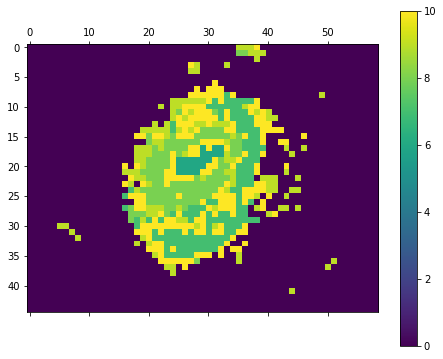

In [10]:
plt.rcParams["figure.figsize"] = (8,6)
spec.plot_segments()

In [11]:
spec.consensus_spectra()

2020-06-05 16:33:19,214  SpectraRegion  INFO: Calculating consensus spectra
2020-06-05 16:33:19,308  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.00512467, 0.00512467, 0.00512467, ..., 0.00222092, 0.00222092,
        0.00222092]),
 9: array([0.00445184, 0.00445184, 0.00445184, ..., 0.00201824, 0.00201824,
        0.00201824]),
 10: array([0.00500629, 0.00500629, 0.00500629, ..., 0.00249978, 0.00249978,
        0.00249978]),
 8: array([0.00764575, 0.00764575, 0.00764575, ..., 0.00242446, 0.00242446,
        0.00242446]),
 7: array([0.00781499, 0.00781499, 0.00781499, ..., 0.00325962, 0.00325962,
        0.00325962]),
 6: array([0.00969619, 0.00969619, 0.00969619, ..., 0.00266749, 0.00266749,
        0.00266749])}

In [12]:
spec.consensus_similarity()

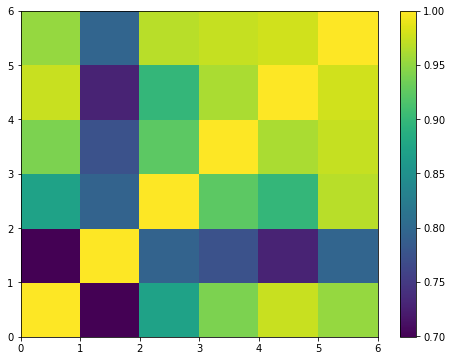

In [13]:
#plt.matshow(spec.consensus_similarity_matrix)
heatmap = plt.pcolor(spec.consensus_similarity_matrix)
plt.colorbar(heatmap)

2020-06-05 16:46:44,417  SpectraRegion  INFO: Found clusterLabels [0, 6, 7, 8, 9, 10]
2020-06-05 16:46:44,422  SpectraRegion  INFO: Processing clusterLabel 0
2020-06-05 16:47:34,014  SpectraRegion  INFO: Processing clusterLabel 6
2020-06-05 16:47:34,020  SpectraRegion  INFO: Processing clusterLabel 7
2020-06-05 16:47:34,266  SpectraRegion  INFO: Processing clusterLabel 8
2020-06-05 16:47:34,442  SpectraRegion  INFO: Processing clusterLabel 9
2020-06-05 16:47:34,599  SpectraRegion  INFO: Processing clusterLabel 10


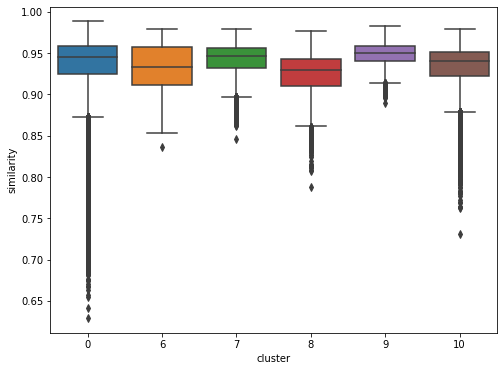

In [15]:
spec.plot_consensus_similarity(mode="spectra")

2020-06-05 16:47:37,314  SpectraRegion  INFO: Found clusterLabels [0, 6, 7, 8, 9, 10]
2020-06-05 16:47:37,315  SpectraRegion  INFO: Processing cluster 0


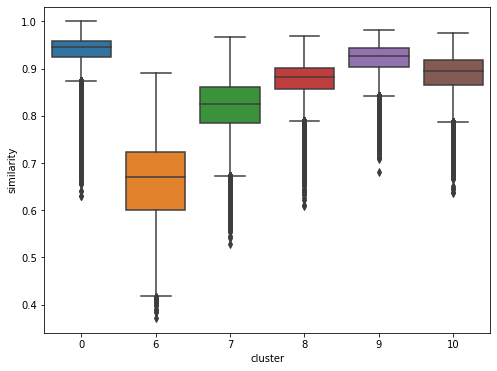

2020-06-05 16:49:52,485  SpectraRegion  INFO: Processing cluster 6


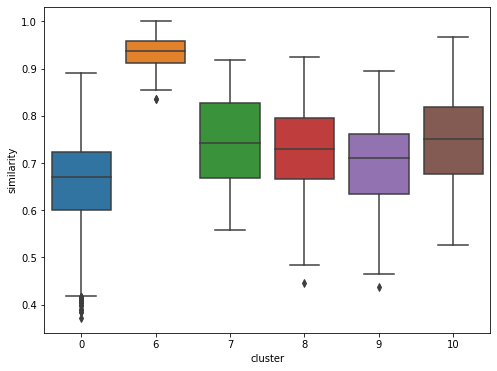

2020-06-05 16:49:54,902  SpectraRegion  INFO: Processing cluster 7


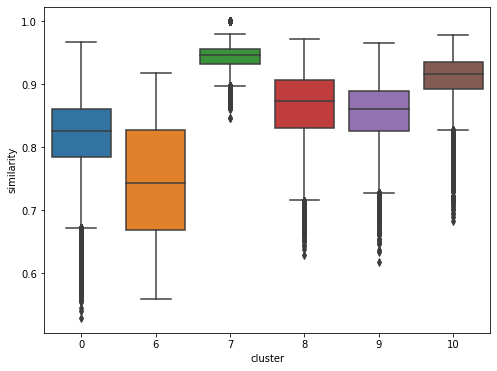

2020-06-05 16:50:07,962  SpectraRegion  INFO: Processing cluster 8


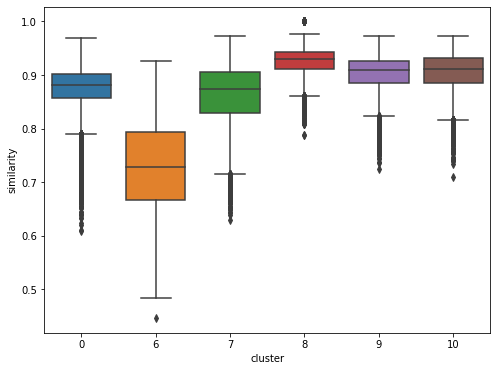

2020-06-05 16:50:18,340  SpectraRegion  INFO: Processing cluster 9


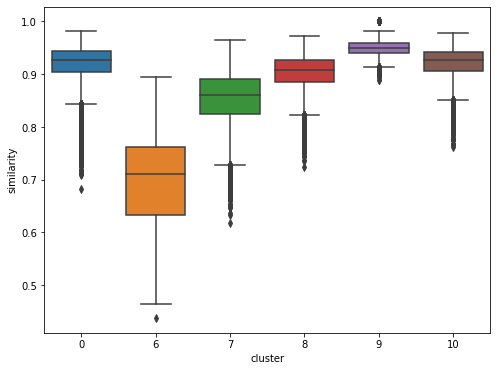

2020-06-05 16:50:28,729  SpectraRegion  INFO: Processing cluster 10


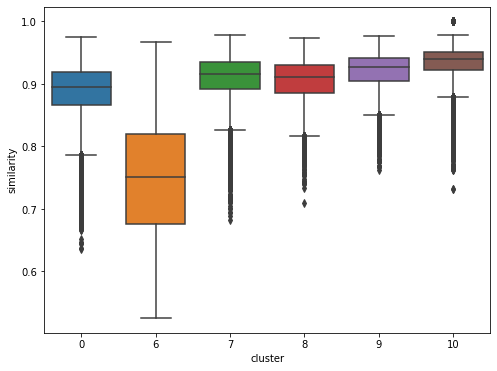

In [16]:
spec.plot_inter_consensus_similarity()

# Differential Analysis

2020-06-05 16:50:47,921  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228


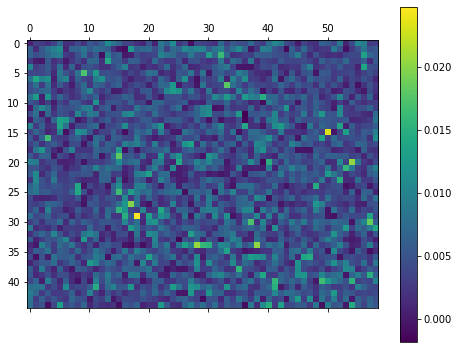

In [17]:
spec.mass_heatmap(12504)

2020-06-05 16:50:48,412  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228


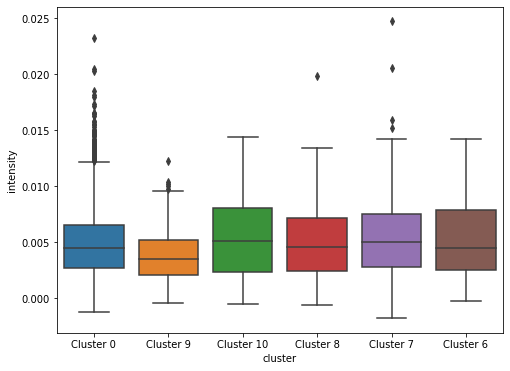

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


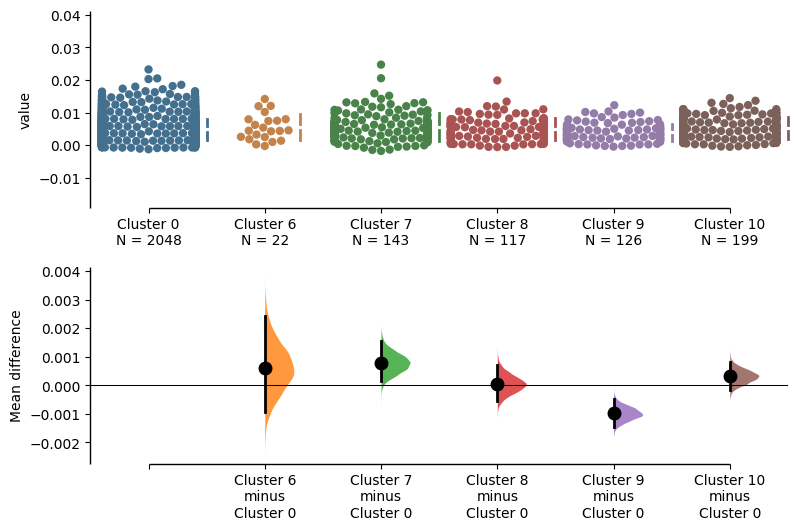

In [18]:
dfobj = spec.mass_dabest(12504)

In [28]:
expdata, samples, names = spec.find_markers([7])

In [29]:
spec.list_de_results()

[((7,), (8,)), ((7,), (0, 9, 10, 8, 6))]

In [30]:
deRes = spec.get_de_result( ((7,), (0, 9, 10, 8, 6)) )

In [31]:
deRes

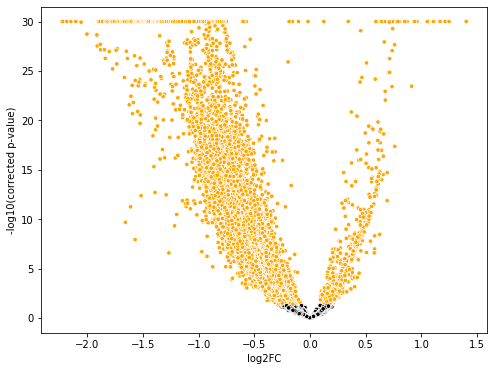

In [32]:
deRes.plot_volcano(corrected_pval=True, min_fc=1)

In [37]:
ttr = deRes.summary()
fttr = ttr[ttr.qval.lt(0.01) & ttr.log2fc.abs().gt(1.0)]
fttr.shape

(1030, 7)

In [38]:
fttr

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
4,mass_3003_643580131069,3.617362e-24,5.400399e-23,-1.016587,200.662150,False,False
5,mass_3005_1527133443933,4.517955e-25,7.013998e-24,-1.053884,221.616956,False,False
88,mass_3130_410770050306,2.399844e-13,1.323389e-12,-1.043116,80.541246,False,False
115,mass_3171_157366810061,3.429575e-30,6.687297e-29,-1.008380,213.748781,False,False
116,mass_3172_666500023385,3.197096e-33,6.780571e-32,-1.028577,210.282491,False,False
241,mass_3361_3081516889165,4.982590e-17,3.999478e-16,-1.012536,123.345762,False,False
242,mass_3362_8172849022408,2.363406e-15,1.578544e-14,-1.009992,111.244070,False,False
554,mass_3833_666847459407,1.574767e-22,2.141971e-21,-1.013249,105.697927,False,False
678,mass_4020_7993659116137,3.057047e-16,2.247275e-15,-1.007074,99.673445,False,False
824,mass_4241_132815056954,1.193940e-74,2.374615e-71,1.212047,505.480962,False,False


In [39]:
fttr.to_csv("filtered_ttest.csv")

In [ ]:
df = pd.DataFrame()

df["mass"] = spec.idx2mass



In [24]:
spec.de_results = {}